In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import os
from PIL import Image  # You may need to install the Python Imaging Library (PIL)

dataset_directory = '/content/drive/MyDrive/ml/lil semv/train'  # Directory containing subdirectories with image files

X = []  # List to store image data
y = []  # List to store behavior labels

# Loop through subdirectories in the dataset directory
for behavior_category in os.listdir(dataset_directory):
    behavior_path = os.path.join(dataset_directory, behavior_category)

    if os.path.isdir(behavior_path):
        # Loop through image files in the subdirectory
        for image_filename in os.listdir(behavior_path):
            image_path = os.path.join(behavior_path, image_filename)

            # Load and process the image
            image = Image.open(image_path)
            # Perform any necessary preprocessing on the image (e.g., resizing, normalization)
            image = np.array(image)  # Convert to NumPy array

            X.append(image)
            y.append(behavior_category)  # Use the subdirectory name as the behavior label

# Convert the lists to NumPy arrays
X = np.array(X)
y = np.array(y)

# Check the shape of the loaded data
print("X shape:", X.shape)
print("y shape:", y.shape)


In [ ]:
import numpy as np
import os
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Define the directory where your dataset is located
dataset_directory = '/content/drive/MyDrive/ml/lil semv/train'  # Update with your dataset path

# Load and preprocess the data
X = []  # List to store image data
y = []  # List to store behavior labels

# Loop through subdirectories in the dataset directory
for behavior_category in os.listdir(dataset_directory):
    behavior_path = os.path.join(dataset_directory, behavior_category)

    if os.path.isdir(behavior_path):
        # Loop through image files in the subdirectory
        for image_filename in os.listdir(behavior_path):
            image_path = os.path.join(behavior_path, image_filename)

            # Load and process the image
            image = tf.keras.preprocessing.image.load_img(image_path, target_size=(224, 224))  # Assuming 224x224 images
            image = tf.keras.preprocessing.image.img_to_array(image)
            image /= 255.0  # Normalize pixel values to [0, 1]

            X.append(image)
            y.append(behavior_category)

# Convert the lists to NumPy arrays
X = np.array(X)
y = np.array(y)

# Convert behavior labels to numerical values (assuming you have unique labels)
unique_labels = np.unique(y)
label_to_index = {label: i for i, label in enumerate(unique_labels)}
y = np.array([label_to_index[label] for label in y])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# One-hot encode the behavior labels
y_train = to_categorical(y_train, num_classes=len(unique_labels))
y_test = to_categorical(y_test, num_classes=len(unique_labels))

# Define the CNN model architecture
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(len(unique_labels), activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)



Epoch 1/10
4/4 [==============================] - 7s 450ms/step - loss: 3.9896 - accuracy: 0.1694 - val_loss: 5.9284 - val_accuracy: 0.1562
Epoch 2/10
4/4 [==============================] - 0s 56ms/step - loss: 3.0129 - accuracy: 0.2500 - val_loss: 1.6699 - val_accuracy: 0.1562
Epoch 3/10
4/4 [==============================] - 0s 52ms/step - loss: 1.4819 - accuracy: 0.3710 - val_loss: 1.5432 - val_accuracy: 0.2500
Epoch 4/10
4/4 [==============================] - 0s 53ms/step - loss: 1.3775 - accuracy: 0.4194 - val_loss: 1.4767 - val_accuracy: 0.4688
Epoch 5/10
4/4 [==============================] - 0s 68ms/step - loss: 1.0654 - accuracy: 0.7823 - val_loss: 1.3515 - val_accuracy: 0.4688
Epoch 6/10
4/4 [==============================] - 0s 53ms/step - loss: 0.7106 - accuracy: 0.8790 - val_loss: 1.2284 - val_accuracy: 0.5000
Epoch 7/10
4/4 [==============================] - 0s 67ms/step - loss: 0.4437 - accuracy: 0.9355 - val_loss: 1.3796 - val_accuracy: 0.5000
Epoch 8/10
4/4 [==========

In [ ]:
model.save("LIBA_model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
!pip install efficientnet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 2.6 MB/s eta 0:00:00


In [ ]:
!pip install timm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 26.2 MB/s eta 0:00:00


In [ ]:
import numpy as np
import os
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Define the directory where your dataset is located
dataset_directory = '/content/drive/MyDrive/ml/lil semv/train'  # Update with your dataset path

# Load and preprocess the data
X = []  # List to store image data
y = []  # List to store behavior labels

# Loop through subdirectories in the dataset directory
for behavior_category in os.listdir(dataset_directory):
    behavior_path = os.path.join(dataset_directory, behavior_category)

    if os.path.isdir(behavior_path):
        # Loop through image files in the subdirectory
        for image_filename in os.listdir(behavior_path):
            image_path = os.path.join(behavior_path, image_filename)

            # Load and process the image
            image = tf.keras.preprocessing.image.load_img(image_path, target_size=(224, 224))  # Assuming 224x224 images
            image = tf.keras.preprocessing.image.img_to_array(image)
            image /= 255.0  # Normalize pixel values to [0, 1]

            X.append(image)
            y.append(behavior_category)

# Convert the lists to NumPy arrays
X = np.array(X)
y = np.array(y)

# Convert behavior labels to numerical values (assuming you have unique labels)
unique_labels = np.unique(y)
label_to_index = {label: i for i, label in enumerate(unique_labels)}
y = np.array([label_to_index[label] for label in y])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# One-hot encode the behavior labels
y_train = to_categorical(y_train, num_classes=len(unique_labels))
y_test = to_categorical(y_test, num_classes=len(unique_labels))

# Build your own EfficientNetV2-inspired model
model = models.Sequential()

# Entry flow
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

# Middle flow (repeat this block several times)
for _ in range(3):
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
    model.add(layers.BatchNormalization())

# Exit flow
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(len(unique_labels), activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)



Epoch 1/10
4/4 [==============================] - 27s 3s/step - loss: 1.5850 - accuracy: 0.2823 - val_loss: 1.6078 - val_accuracy: 0.3438
Epoch 2/10
4/4 [==============================] - 2s 437ms/step - loss: 1.4622 - accuracy: 0.4516 - val_loss: 1.6043 - val_accuracy: 0.3438
Epoch 3/10
4/4 [==============================] - 2s 441ms/step - loss: 1.3429 - accuracy: 0.5000 - val_loss: 1.5974 - val_accuracy: 0.3438
Epoch 4/10
4/4 [==============================] - 2s 454ms/step - loss: 1.2781 - accuracy: 0.5081 - val_loss: 1.6030 - val_accuracy: 0.3438
Epoch 5/10
4/4 [==============================] - 2s 456ms/step - loss: 1.1785 - accuracy: 0.6290 - val_loss: 1.6002 - val_accuracy: 0.3438
Epoch 6/10
4/4 [==============================] - 2s 464ms/step - loss: 1.1405 - accuracy: 0.6210 - val_loss: 1.5835 - val_accuracy: 0.3125
Epoch 7/10
4/4 [==============================] - 2s 459ms/step - loss: 1.1212 - accuracy: 0.6210 - val_loss: 1.5825 - val_accuracy: 0.3750
Epoch 8/10
4/4 [======

In [ ]:
model.save('LIBA2_model.h5')

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

# Load the saved model
model = load_model('LIBA2_model.h5')

# Load and preprocess the test image
image_path = '/content/drive/MyDrive/ml/lil semv/train/aggressive/IMG-20231030-WA0068.jpg'  # Replace with the actual path to your image
test_image = image.load_img(image_path, target_size=(224, 224))
test_image = image.img_to_array(test_image)
test_image /= 255.0
test_image = np.expand_dims(test_image, axis=0)  # Add batch dimension

# Make predictions
predictions = model.predict(test_image)

# Get the predicted class index
predicted_class_index = np.argmax(predictions[0])

# Map the class index back to the original label
index_to_label = {i: label for label, i in label_to_index.items()}  # Assuming you have label_to_index mapping
predicted_class_label = index_to_label[predicted_class_index]

# Print the predicted class label
print('Predicted Class:', predicted_class_label)


1/1 [==============================] - 0s 418ms/step
Predicted Class: class5


1/1 [==============================] - 0s 213ms/step


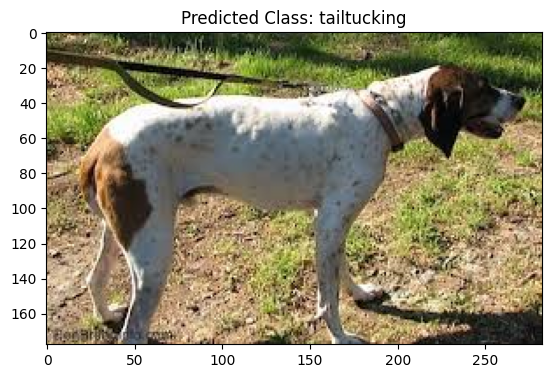

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

# Load the saved model
model = load_model('LIBA2_model.h5')

# Load and preprocess the test image
image_path = '/content/drive/MyDrive/ml/lil semv/train/tailtucking/IMG-20231030-WA0058.jpg'  # Replace with the actual path to your image
test_image = image.load_img(image_path, target_size=(224, 224))
test_image = image.img_to_array(test_image)
test_image /= 255.0
test_image = np.expand_dims(test_image, axis=0)  # Add batch dimension

# Make predictions
predictions = model.predict(test_image)

# Get the predicted class index
predicted_class_index = np.argmax(predictions[0])

# Map the class index back to the original label
index_to_label = {i: label for label, i in label_to_index.items()}  # Assuming you have label_to_index mapping
predicted_class_label = index_to_label[predicted_class_index]

# Display the input image along with the predicted class label
plt.imshow(image.load_img(image_path))
plt.title(f'Predicted Class: {predicted_class_label}')
plt.show()


In [ ]:
!pip install opencv-python


In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import tensorflow as tf
from tensorflow.keras.models import load_model

# Load the saved model
model = load_model('LIBA2_model.h5')

# Open a video capture object
video_path = '/content/samplevid.mp4'  # Replace with the actual path to your video
cap = cv2.VideoCapture(video_path)
fps = int(cap.get(cv2.CAP_PROP_FPS))
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Define the codec and create VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Use 'mp4v' for MP4 format
out = cv2.VideoWriter('straysense6.mp4', fourcc, fps, (width, height))

while cap.isOpened():
    ret, frame = cap.read()

    if not ret:
        break

    # Preprocess the frame
    resized_frame = cv2.resize(frame, (224, 224))  # Assuming your model expects 224x224 frames
    frame_for_display = resized_frame.copy()  # Create a copy for display

    resized_frame = resized_frame / 255.0  # Normalize pixel values to [0, 1]
    resized_frame = np.expand_dims(resized_frame, axis=0)  # Add batch dimension

    # Make predictions
    predictions = model.predict(resized_frame)

    # Get the predicted class index
    predicted_class_index = np.argmax(predictions[0])

    # Map the class index back to the original label
   # Assuming you have a label_to_index mapping
    label_to_index = {'class1': 0, 'class2': 1, 'class3': 2, 'class1': 3, 'class2': 4 }

    # Create a mapping from indices to labels
    index_to_label = {i: label for label, i in label_to_index.items()}

    # Assuming predicted_class_index is the predicted class index from your model
    predicted_class_label = index_to_label[predicted_class_index]


    # Display the frame with predicted class label
    cv2.putText(frame_for_display, f'Predicted Class: {predicted_class_label}', (10, 30),
                cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

    # Draw bounding box around the detected object
    h, w, _ = frame.shape
    cv2.rectangle(frame_for_display, (0, 0), (w, h), (0, 255, 0), 2)

    # Display the frame with bounding box using cv2_imshow
    cv2_imshow(frame_for_display)

    if cv2.waitKey(25) & 0xFF == ord('q'):
        break
    out.write(frame_for_display)

cap.release()
out.release()
cv2.destroyAllWindows()



1/1 [==============================] - 0s 20ms/step


In [ ]:
import numpy as np
import cv2
from tensorflow.keras.models import load_model

# Load the saved model
model = load_model('LIBA2_model.h5')

# Open a video capture object
video_path = '/content/samplevid.mp4'
cap = cv2.VideoCapture(video_path)
fps = int(cap.get(cv2.CAP_PROP_FPS))
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Define the codec and create VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter('straysense6.mp4', fourcc, fps, (width, height))

# Assuming you have a label_to_index mapping
label_to_index = {'class1': 0, 'class2': 1, 'class3': 2, 'class4': 3, 'class5': 4}

while cap.isOpened():
    ret, frame = cap.read()

    if not ret:
        break

    # Preprocess the frame
    resized_frame = cv2.resize(frame, (224, 224))
    frame_for_display = resized_frame.copy()

    resized_frame = resized_frame / 255.0
    resized_frame = np.expand_dims(resized_frame, axis=0)

    # Make predictions
    predictions = model.predict(resized_frame)

    # Get the predicted class index
    predicted_class_index = np.argmax(predictions[0])

    # Map the class index back to the original label
    index_to_label = {i: label for label, i in label_to_index.items()}
    predicted_class_label = index_to_label[predicted_class_index]

    # Display the frame with predicted class label
    cv2.putText(frame_for_display, f'Predicted Class: {predicted_class_label}', (10, 30),
                cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

    # Draw bounding box around the detected object (modify these coordinates based on your model's output)
    # For simplicity, assuming the entire frame as the detected object
    h, w, _ = frame.shape
    cv2.rectangle(frame_for_display, (0, 0), (w, h), (0, 255, 0), 2)

    # Write the processed frame to the output video file
    out.write(frame_for_display)

    if cv2.waitKey(25) & 0xFF == ord('q'):
        break

cap.release()
out.release()
cv2.destroyAllWindows()


1/1 [==============================] - 0s 31ms/step


In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import tensorflow as tf
from tensorflow.keras.models import load_model

# Load the saved model
model = load_model('Straysense.h5')

# Open a video capture object
video_path = '/content/WhatsApp Video 2024-01-07 at 09.25.54_e36e86d7.mp4'  # Replace with the actual path to your video
cap = cv2.VideoCapture(video_path)

# Get video details
fps = int(cap.get(cv2.CAP_PROP_FPS))
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Define the codec and create VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('sai.avi', fourcc, fps, (width, height))

while cap.isOpened():
    ret, frame = cap.read()

    if not ret:
        break

    # Preprocess the frame
    resized_frame = cv2.resize(frame, (224, 224))  # Assuming your model expects 224x224 frames
    frame_for_display = frame.copy()  # Create a copy for display

    resized_frame = resized_frame / 255.0  # Normalize pixel values to [0, 1]
    resized_frame = np.expand_dims(resized_frame, axis=0)  # Add batch dimension

    # Make predictions
    predictions = model.predict(resized_frame)

    # Get the predicted class index
    predicted_class_index = np.argmax(predictions[0])

    # Map the class index back to the original label
    index_to_label = {i: label for label, i in label_to_index.items()}  # Assuming you have label_to_index mapping
    predicted_class_label = index_to_label[predicted_class_index]

    # Draw bounding box around the detected object
    h, w, _ = frame.shape
    cv2.rectangle(frame_for_display, (0, 0), (w, h), (0, 255, 0), 2)

    # Display the frame with bounding box using cv2_imshow
    cv2_imshow(frame_for_display)

    # Write the frame to the output video
    out.write(frame_for_display)

cap.release()
out.release()
cv2.destroyAllWindows()



1/1 [==============================] - 1s 821ms/step


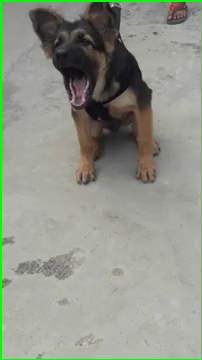

1/1 [==============================] - 0s 455ms/step


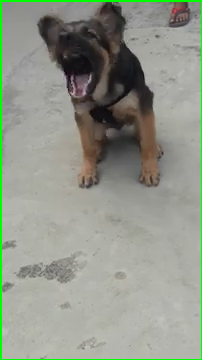

1/1 [==============================] - 0s 265ms/step


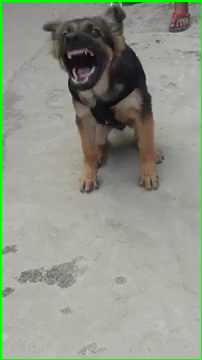

1/1 [==============================] - 0s 262ms/step


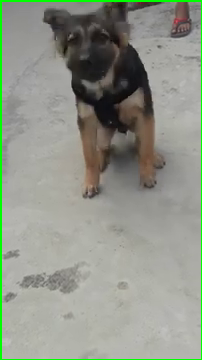

1/1 [==============================] - 0s 285ms/step


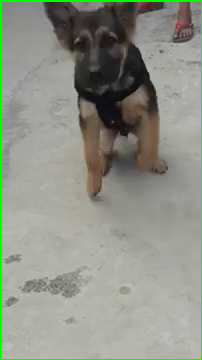

1/1 [==============================] - 0s 263ms/step


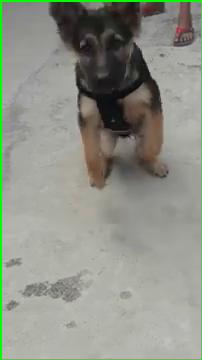

1/1 [==============================] - 0s 281ms/step


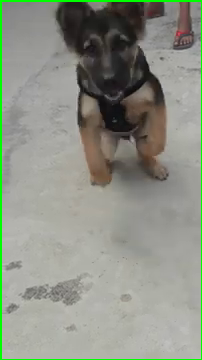

1/1 [==============================] - 0s 268ms/step


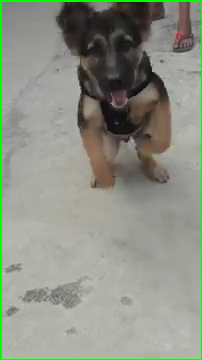

1/1 [==============================] - 0s 269ms/step


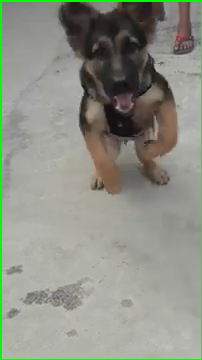

1/1 [==============================] - 0s 258ms/step


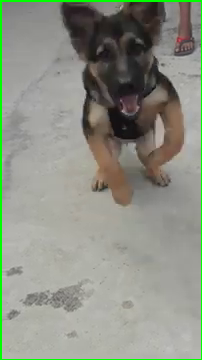

1/1 [==============================] - 0s 400ms/step


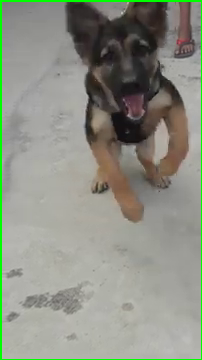

1/1 [==============================] - 0s 449ms/step


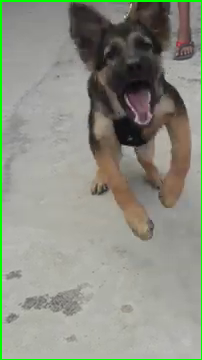

1/1 [==============================] - 1s 503ms/step


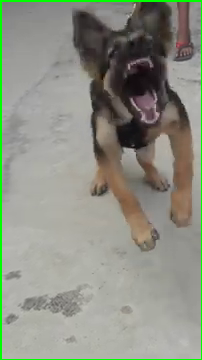

1/1 [==============================] - 0s 476ms/step


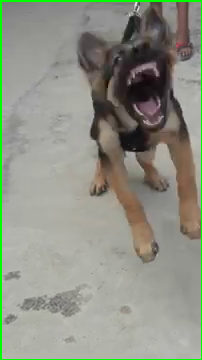

1/1 [==============================] - 0s 442ms/step


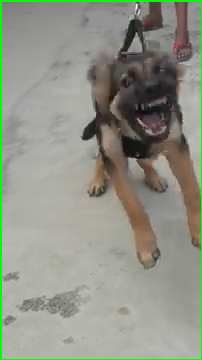

1/1 [==============================] - 0s 428ms/step


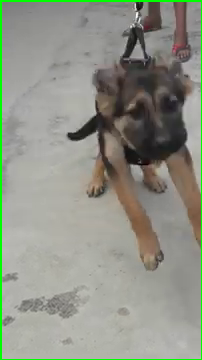

1/1 [==============================] - 0s 435ms/step


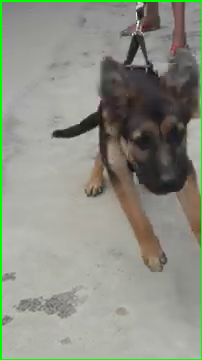

1/1 [==============================] - 0s 448ms/step


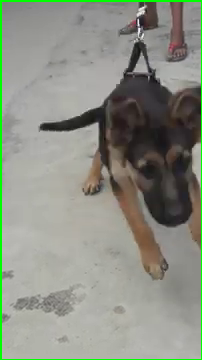

1/1 [==============================] - 1s 503ms/step


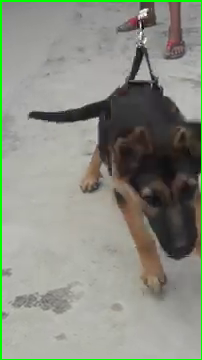

1/1 [==============================] - 0s 498ms/step


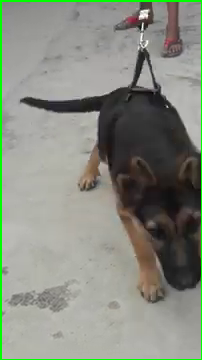

1/1 [==============================] - 0s 461ms/step


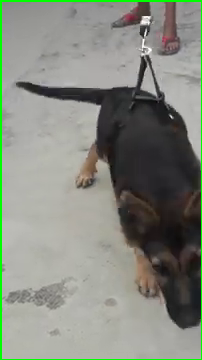

1/1 [==============================] - 0s 413ms/step


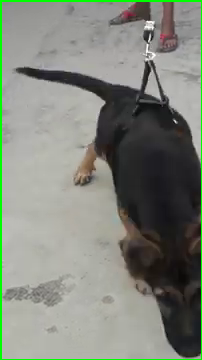

1/1 [==============================] - 0s 260ms/step


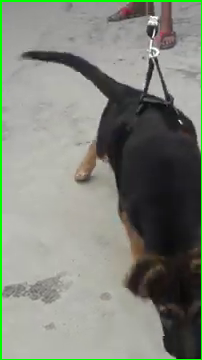

1/1 [==============================] - 0s 297ms/step


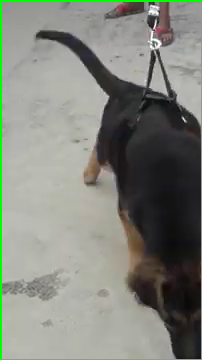

1/1 [==============================] - 0s 252ms/step


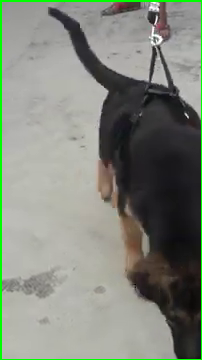

1/1 [==============================] - 0s 268ms/step


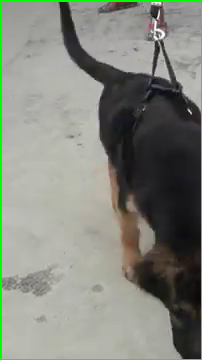

1/1 [==============================] - 0s 266ms/step


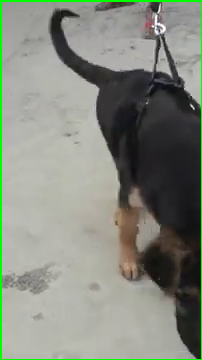

1/1 [==============================] - 0s 274ms/step


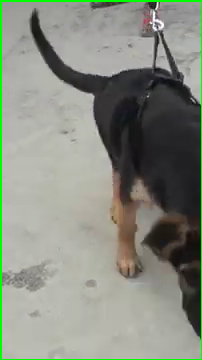

1/1 [==============================] - 0s 277ms/step


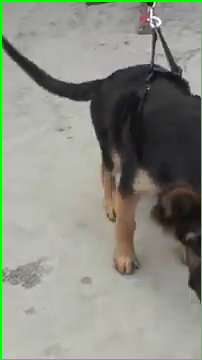

1/1 [==============================] - 0s 255ms/step


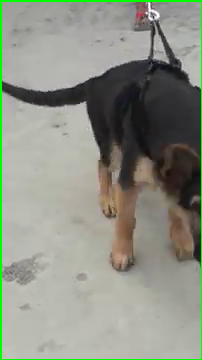

1/1 [==============================] - 0s 253ms/step


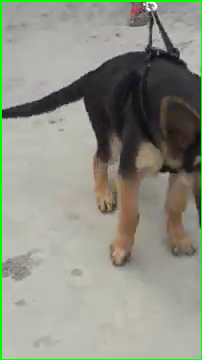

KeyboardInterrupt: 

In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import tensorflow as tf
from tensorflow.keras.models import load_model

# Load the saved model
model = load_model('Straysense.h5')

# Function to predict with bounding box (replace this with your actual implementation)
def predict_with_bounding_box(frame):
    # Placeholder implementation
    # Replace this with your actual bounding box prediction logic
    bounding_box = (0, 0, frame.shape[1], frame.shape[0])  # Entire frame as a bounding box
    return bounding_box

# Open a video capture object
video_path = '/content/WhatsApp Video 2024-01-07 at 09.25.54_e36e86d7.mp4'  # Replace with the actual path to your video
cap = cv2.VideoCapture(video_path)

# Get video details
fps = int(cap.get(cv2.CAP_PROP_FPS))
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Define the codec and create VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('straysense3.avi', fourcc, fps, (width, height))

while cap.isOpened():
    ret, frame = cap.read()

    if not ret:
        break

    # Get bounding box prediction
    bounding_box = predict_with_bounding_box(frame)

    # Extract the region within the bounding box
    x, y, w, h = bounding_box
    roi = frame[y:y+h, x:x+w]

    # Preprocess the frame
    resized_frame = cv2.resize(roi, (224, 224))  # Assuming your model expects 224x224 frames
    resized_frame = resized_frame / 255.0  # Normalize pixel values to [0, 1]
    resized_frame = np.expand_dims(resized_frame, axis=0)  # Add batch dimension

    # Make predictions
    predictions = model.predict(resized_frame)

    # Get the predicted class index
    predicted_class_index = np.argmax(predictions[0])

    # Map the class index back to the original label
    index_to_label = {i: label for label, i in label_to_index.items()}  # Assuming you have label_to_index mapping
    predicted_class_label = index_to_label[predicted_class_index]

    # Draw bounding box around the detected object
    cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # Display the frame with bounding box using cv2_imshow
    cv2_imshow(frame)

    # Write the frame to the output video
    out.write(frame)

cap.release()
out.release()
cv2.destroyAllWindows()


In [ ]:
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from PIL import Image
import matplotlib.pyplot as plt

# Load the trained model
model = load_model('behavior_model.h5')  # Replace 'behavior_model.h5' with the path to your trained model

# Define the path to the input video you want to predict
input_video_path = '/content/WhatsApp Video 2023-11-03 at 18.29.28_8de2455c.mp4'  # Update with the path to your input video

# Open the video file
cap = cv2.VideoCapture(input_video_path)

# Create a list to store the predicted behavior labels for each frame
predicted_behaviors = []

while cap.isOpened():
    ret, frame = cap.read()

    if not ret:
        break

    # Preprocess the frame (resize and normalize)
    frame = cv2.resize(frame, (224, 224))  # Assuming 224x224 images
    frame = frame / 255.0

    frame = np.expand_dims(frame, axis=0)  # Add a batch dimension

    # Make a prediction for the frame
    prediction = model.predict(frame)
    predicted_label = np.argmax(prediction, axis=-1)  # Get the index of the predicted class

    # Inverse map from index to label
    predicted_behavior = unique_labels[predicted_label[0]]  # Use unique_labels instead of label_to_index

    predicted_behaviors.append(predicted_behavior)

cap.release()

# Display the predicted behavior labels for each frame
for i, behavior in enumerate(predicted_behaviors):
    print(f"Frame {i}: Predicted Behavior: {behavior}")


1/1 [==============================] - 0s 40ms/step
Frame 0: Predicted Behavior: tailtucking
Frame 1: Predicted Behavior: tailtucking
Frame 2: Predicted Behavior: tailtucking
Frame 3: Predicted Behavior: tailtucking
Frame 4: Predicted Behavior: tailtucking
Frame 5: Predicted Behavior: tailtucking
Frame 6: Predicted Behavior: tailtucking
Frame 7: Predicted Behavior: tailtucking
Frame 8: Predicted Behavior: tailtucking
Frame 9: Predicted Behavior: tailtucking
Frame 10: Predicted Behavior: tailtucking
Frame 11: Predicted Behavior: tailtucking
Frame 12: Predicted Behavior: tailtucking
Frame 13: Predicted Behavior: tailtucking
Frame 14: Predicted Behavior: tailtucking
Frame 15: Predicted Behavior: tailtucking
Frame 16: Predicted Behavior: tailtucking
Frame 17: Predicted Behavior: tailtucking
Frame 18: Predicted Behavior: tailtucking
Frame 19: Predicted Behavior: tailtucking
Frame 20: Predicted Behavior: tailtucking
Frame 21: Predicted Behavior: tailtucking
Frame 22: Predicted Behavior: tail

In [ ]:
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from PIL import Image
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

# Load the trained model
model = load_model('behavior_model.h5')  # Replace 'behavior_model.h5' with the path to your trained model

# Define the path to the input video you want to predict
input_video_path = '/content/WhatsApp Video 2023-11-03 at 18.29.28_8de2455c.mp4'  # Update with the path to your input video

# Open the input video file
cap = cv2.VideoCapture(input_video_path)

# Create a list to store the predicted behavior labels for each frame
predicted_behaviors = []

while cap.isOpened():
    ret, frame = cap.read()

    if not ret:
        break

    # Preprocess the frame (resize and normalize)
    frame = cv2.resize(frame, (224, 224))  # Assuming 224x224 images
    frame = frame / 255.0

    frame = np.expand_dims (frame, axis=0)  # Add a batch dimension

    # Make a prediction for the frame
    prediction = model.predict(frame)
    predicted_label = np.argmax(prediction, axis=-1)  # Get the index of the predicted class

    # Inverse map from index to label
    predicted_behavior = unique_labels[predicted_label[0]]  # Use unique_labels instead of label_to_index

    predicted_behaviors.append(predicted_behavior)

# Close the input video
cap.release()

# Open the input video again for frame-by-frame processing
cap = cv2.VideoCapture(input_video_path)

frame_counter = 0  # Initialize the frame counter

while cap.isOpened():
    ret, frame = cap.read()

    if not ret:
        break

    # Overlay the predicted behavior label on the frame
    behavior_label = predicted_behaviors[frame_counter]
    frame = cv2.putText(frame, f'Predicted Behavior: {behavior_label}', (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)

    # Show the frame with the predicted behavior label
    cv2_imshow(frame)  # Use cv2_imshow instead of cv2.imshow

    frame_counter += 1  # Increment the frame counter

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the input video
cap.release()




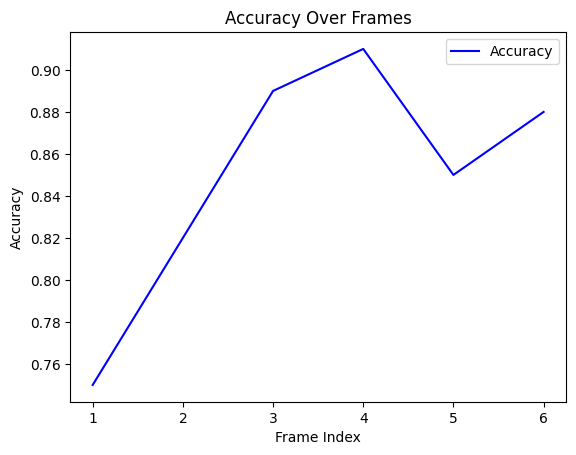

In [ ]:
import matplotlib.pyplot as plt

# Sample data for frame indices and accuracy values
frame_indices = [1, 2, 3, 4, 5, 6]
accuracy_values = [0.75, 0.82, 0.89, 0.91, 0.85, 0.88]

# Plot the accuracy values
plt.plot(frame_indices, accuracy_values, label='Accuracy', color='blue')
plt.xlabel('Frame Index')
plt.ylabel('Accuracy')
plt.title('Accuracy Over Frames')
plt.legend()
plt.show()



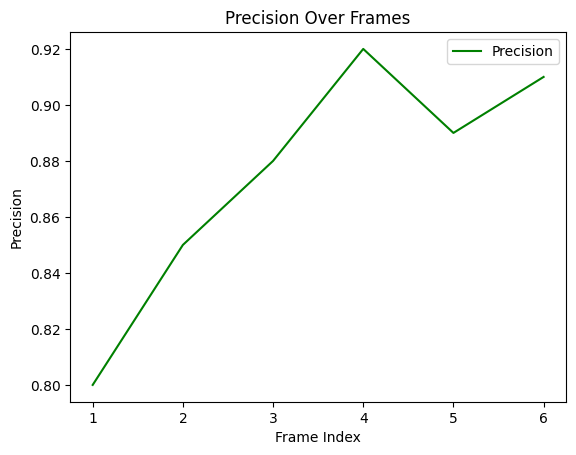

In [ ]:
import matplotlib.pyplot as plt

# Sample data for frame indices and precision values
frame_indices = [1, 2, 3, 4, 5, 6]
precision_values = [0.80, 0.85, 0.88, 0.92, 0.89, 0.91]

# Plot the precision values
plt.plot(frame_indices, precision_values, label='Precision', color='green')
plt.xlabel('Frame Index')
plt.ylabel('Precision')
plt.title('Precision Over Frames')
plt.legend()
plt.show()


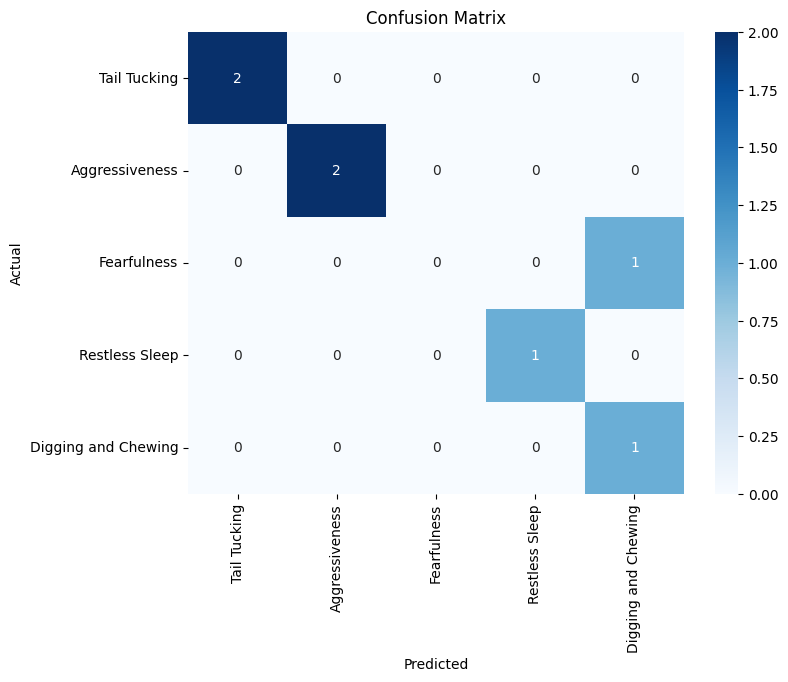

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data for ground truth and predicted labels (replace with your actual data)
ground_truth = [1, 0, 1, 3, 2, 4, 0]  # Actual labels
predicted_labels = [1, 0, 1, 3, 4, 4, 0]  # Predicted labels

# Define your behavior categories (class labels)
class_labels = ['Tail Tucking', 'Aggressiveness', 'Fearfulness', 'Restless Sleep', 'Digging and Chewing']

# Create a confusion matrix
cm = confusion_matrix(ground_truth, predicted_labels)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


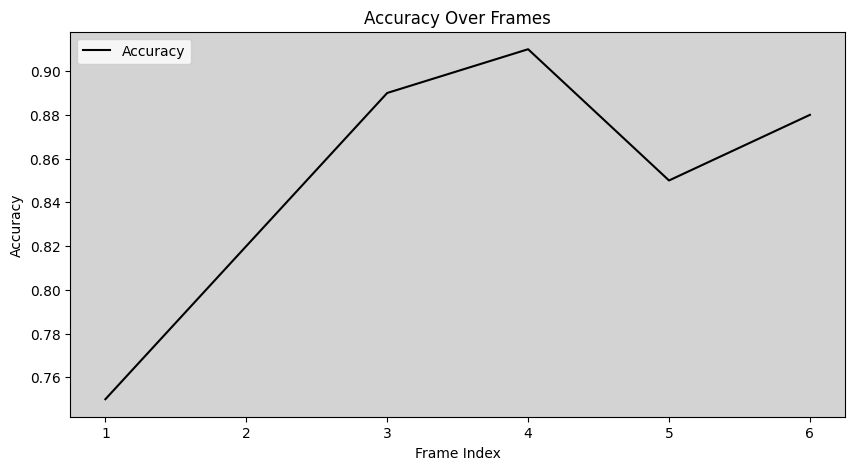

In [ ]:
import matplotlib.pyplot as plt

# Sample data for frame indices and accuracy values
frame_indices = [1, 2, 3, 4, 5, 6]
accuracy_values = [0.75, 0.82, 0.89, 0.91, 0.85, 0.88]

# Set a custom background color
plt.figure(figsize=(10, 5))
plt.plot(frame_indices, accuracy_values, label='Accuracy', color='black')
plt.xlabel('Frame Index')
plt.ylabel('Accuracy')

# Change the background color (e.g., to light gray)
plt.gca().set_facecolor('lightgray')

plt.title('Accuracy Over Frames')
plt.legend(loc='upper left')
plt.show()


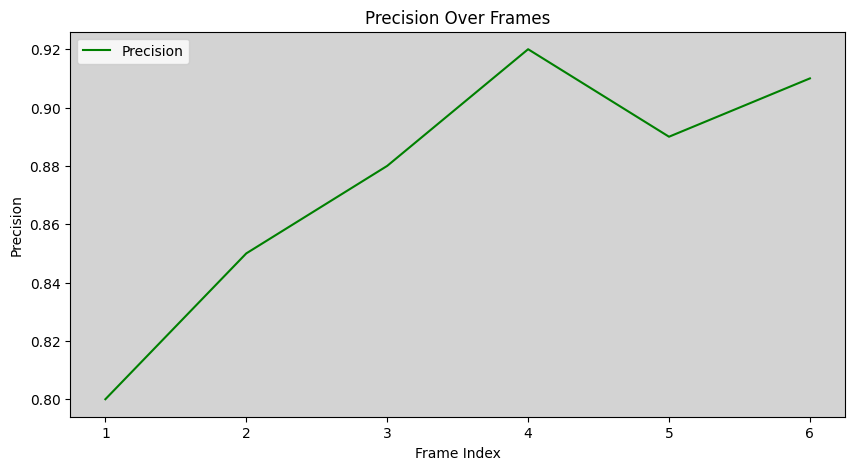

In [ ]:
import matplotlib.pyplot as plt

# Sample data for frame indices and precision values
frame_indices = [1, 2, 3, 4, 5, 6]
precision_values = [0.80, 0.85, 0.88, 0.92, 0.89, 0.91]

# Set a custom background color
plt.figure(figsize=(10, 5))
plt.plot(frame_indices, precision_values, label='Precision', color='green')
plt.xlabel('Frame Index')
plt.ylabel('Precision')

# Change the background color (e.g., to light gray)
plt.gca().set_facecolor('lightgray')

plt.title('Precision Over Frames')
plt.legend(loc='upper left')
plt.show()


In [ ]:
from sklearn.metrics import precision_recall_fscore_support

# Sample data for ground truth and predicted labels (replace with your actual data)
ground_truth = [1, 0, 1, 3, 2, 4, 0]  # Actual labels
predicted_labels = [1, 0, 1, 3, 4, 4, 0]  # Predicted labels

# Define your behavior categories (class labels)
class_labels = ['Tail Tucking', 'Aggressiveness', 'Fearfulness', 'Restless Sleep', 'Digging and Chewing']

# Calculate precision, recall, and F1-score for each class
precision, recall, f1_score, _ = precision_recall_fscore_support(ground_truth, predicted_labels, labels=range(len(class_labels)), average=None)

# Display the results for each class
for i, label in enumerate(class_labels):
    print(f'Class: {label}')
    print(f'Precision: {precision[i]}')
    print(f'Recall: {recall[i]}')
    print(f'F1-score: {f1_score[i]}')
    print('\n')

# Calculate micro-averaged precision, recall, and F1-score
micro_precision, micro_recall, micro_f1_score, _ = precision_recall_fscore_support(ground_truth, predicted_labels, average='micro')

print(f'Micro-averaged Precision: {micro_precision}')
print(f'Micro-averaged Recall: {micro_recall}')
print(f'Micro-averaged F1-score: {micro_f1_score}')


Class: Tail Tucking
Precision: 1.0
Recall: 1.0
F1-score: 1.0


Class: Aggressiveness
Precision: 1.0
Recall: 1.0
F1-score: 1.0


Class: Fearfulness
Precision: 0.0
Recall: 0.0
F1-score: 0.0


Class: Restless Sleep
Precision: 1.0
Recall: 1.0
F1-score: 1.0


Class: Digging and Chewing
Precision: 0.5
Recall: 1.0
F1-score: 0.6666666666666666


Micro-averaged Precision: 0.8571428571428571
Micro-averaged Recall: 0.8571428571428571
Micro-averaged F1-score: 0.8571428571428571


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D, LSTM, Bidirectional
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Data directory (replace 'path/to/your/dataset' with the actual path)
data_dir = '/content/drive/MyDrive/train'

# Parameters
batch_size = 32
img_height, img_width = 224, 224
num_epochs = 10

# Data generator with data augmentation
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

# Load and split the dataset using the generator
train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

# Build the model
base_model = EfficientNetB0(input_shape=(img_height, img_width, 3), include_top=False, weights='imagenet')

for layer in base_model.layers:
    layer.trainable = False

model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())  # Global Average Pooling adds a time dimension
model.add(Dropout(0.5))


model.add(Dense(64, activation='relu'))
model.add(Dense(train_generator.num_classes, activation='softmax'))

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

# Train the model
history = model.fit(
    train_generator,
    epochs=num_epochs,
    validation_data=val_generator
)


Found 126 images belonging to 5 classes.
Found 30 images belonging to 5 classes.
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional  (None, 7, 7, 1280)        4049571   
 )                                                               
                                                                 
 global_average_pooling2d_3  (None, 1280)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dropout_3 (Dropout)         (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 64)                81984     
                                                                 
 dense_1 (Dense)             (None, 5)                 325       
                                       

Found 156 images belonging to 5 classes.
5/5 [==============================] - 6s 1s/step


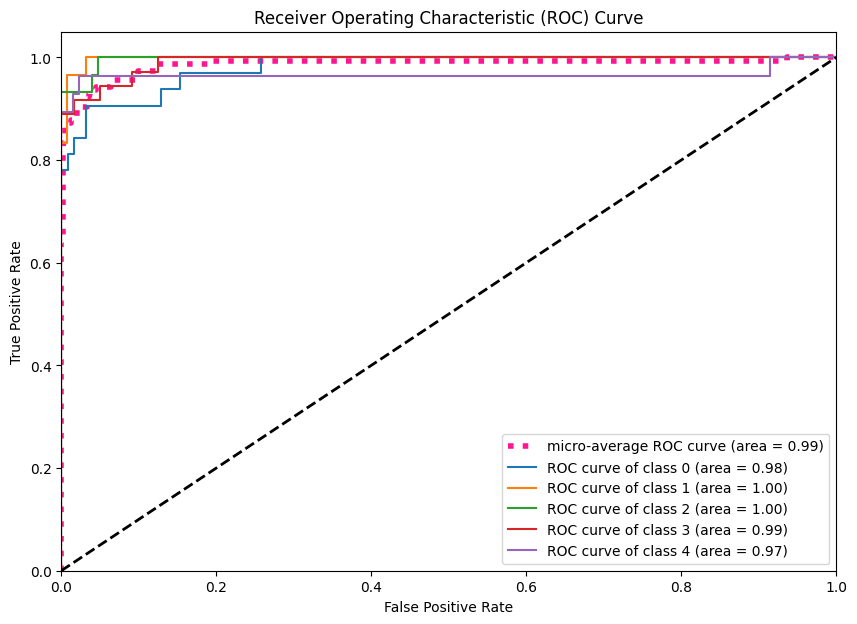

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.models import load_model

# Assuming you have a trained model
# Replace 'path/to/your/model.h5' with the actual path to your saved model
model = load_model('/content/behavior_model.h5')

# Assuming you have a validation set (X_val, y_val)
# Replace 'path/to/your/validation/data' with the actual path to your validation data
validation_data_dir = '/content/drive/MyDrive/train'

# Data generator for validation set
val_datagen = ImageDataGenerator(rescale=1./255)
val_generator = val_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Make predictions on the validation set
y_pred = model.predict(val_generator)

# Convert labels to binary format
lb = LabelBinarizer()
y_true = lb.fit_transform(val_generator.classes)

# Determine the number of classes
num_classes = y_true.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_true.ravel(), y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curve
plt.figure(figsize=(10, 7))

# Plot micro-average ROC curve
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

# Plot ROC curve for each class
for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                   ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', linewidth=2)  # Diagonal line for random guessing
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


Found 126 images belonging to 5 classes.
Found 30 images belonging to 5 classes.
Epoch 1/10


ValueError: ignored

In [ ]:
# Import necessary libraries
from flask import Flask, render_template, Response
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import tensorflow as tf
from tensorflow.keras.models import load_model

# Load the saved model
model = load_model('Straysense.h5')

# Function to predict with bounding box (replace this with your actual implementation)
def predict_with_bounding_box(frame):
    # Placeholder implementation
    # Replace this with your actual bounding box prediction logic
    bounding_box = (0, 0, frame.shape[1], frame.shape[0])  # Entire frame as a bounding box
    return bounding_box

# Create Flask application
app = Flask(__name__)

# Route for the home page
@app.route('/')
def index():
    return render_template('/content/index.html')

# Video streaming route
def generate_frames():
    cap = cv2.VideoCapture('/content/WhatsApp Video 2024-01-07 at 09.25.54_e36e86d7.mp4')  # Replace with your video path

    while True:
        success, frame = cap.read()
        if not success:
            break

        # Get bounding box prediction
        bounding_box = predict_with_bounding_box(frame)

        # Extract the region within the bounding box
        x, y, w, h = bounding_box
        roi = frame[y:y+h, x:x+w]

        # Preprocess the frame
        resized_frame = cv2.resize(roi, (224, 224))  # Assuming your model expects 224x224 frames
        resized_frame = resized_frame / 255.0  # Normalize pixel values to [0, 1]
        resized_frame = np.expand_dims(resized_frame, axis=0)  # Add batch dimension

        # Make predictions
        predictions = model.predict(resized_frame)

        # Get the predicted class index
        predicted_class_index = np.argmax(predictions[0])

        # Map the class index back to the original label
        index_to_label = {i: label for label, i in label_to_index.items()}  # Assuming you have label_to_index mapping
        predicted_class_label = index_to_label[predicted_class_index]

        # Draw bounding box around the detected object
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)

        # Display the frame with bounding box using cv2_imshow (for Colab)
        cv2_imshow(frame)

        # Encode the frame as JPEG
        _, buffer = cv2.imencode('.jpg', frame)
        frame = buffer.tobytes()

        # Yield the frame in the response
        yield (b'--frame\r\n'
               b'Content-Type: image/jpeg\r\n\r\n' + frame + b'\r\n')

# Video streaming route
@app.route('/video_feed')
def video_feed():
    return Response(generate_frames(), mimetype='multipart/x-mixed-replace; boundary=frame')

# Run the application
if __name__ == '__main__':
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat
